**•	Assignment:**

**o   Data cleaning, EDA on Titanic dataset (Titanic: Machine Learning from Disaster (Kaggle))**

**o	Push notebook to GitHub with detailed README**


# Titanic Survival Analysis: Data Cleaning and EDA

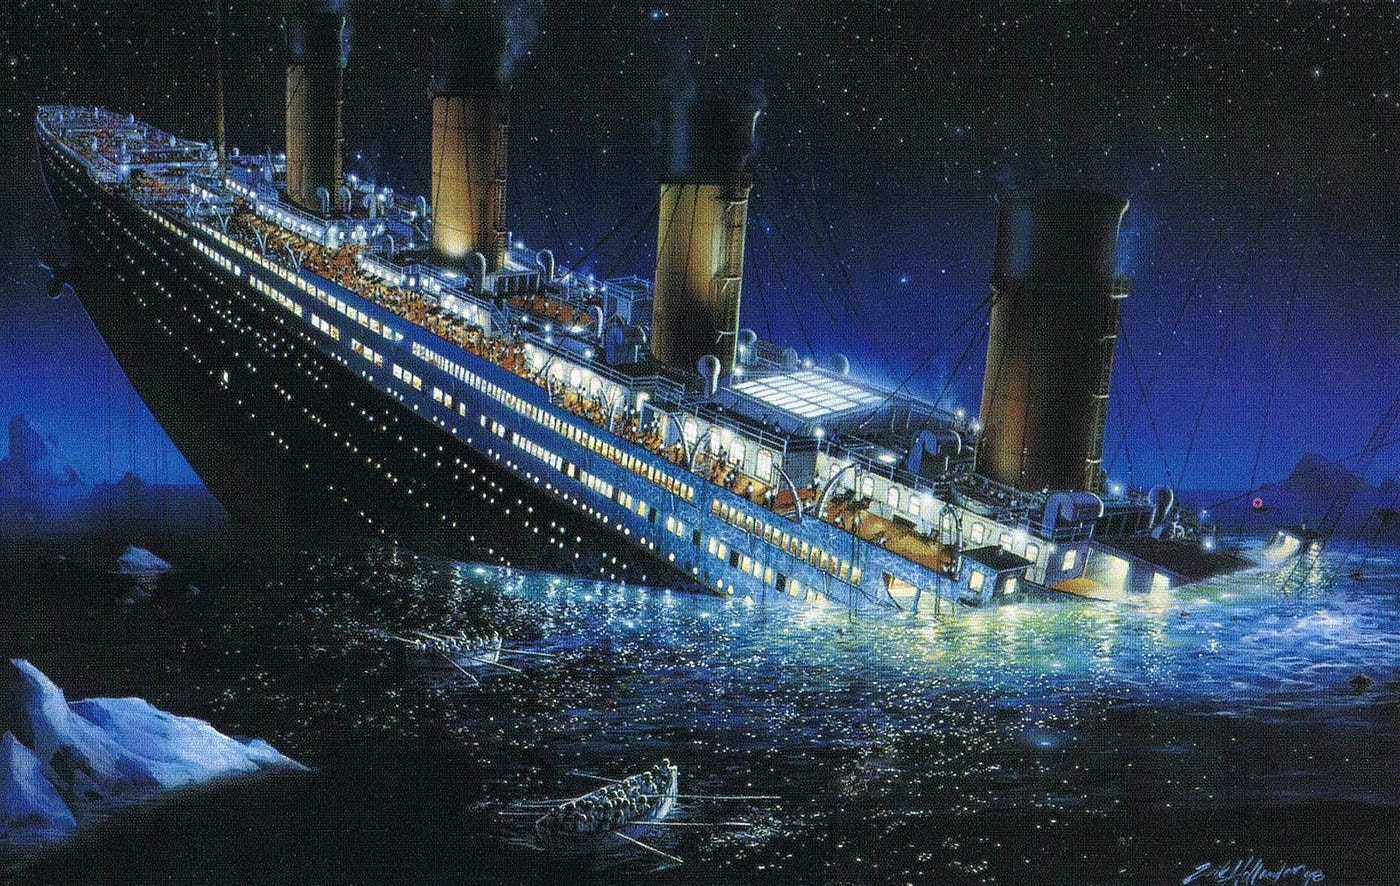

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
#Load 
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
#EDA
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [5]:
#Data Cleaning

In [6]:
#Fill missing values
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())

train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

In [7]:
#Drop cabin column
train_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

**Missing values heatmap**

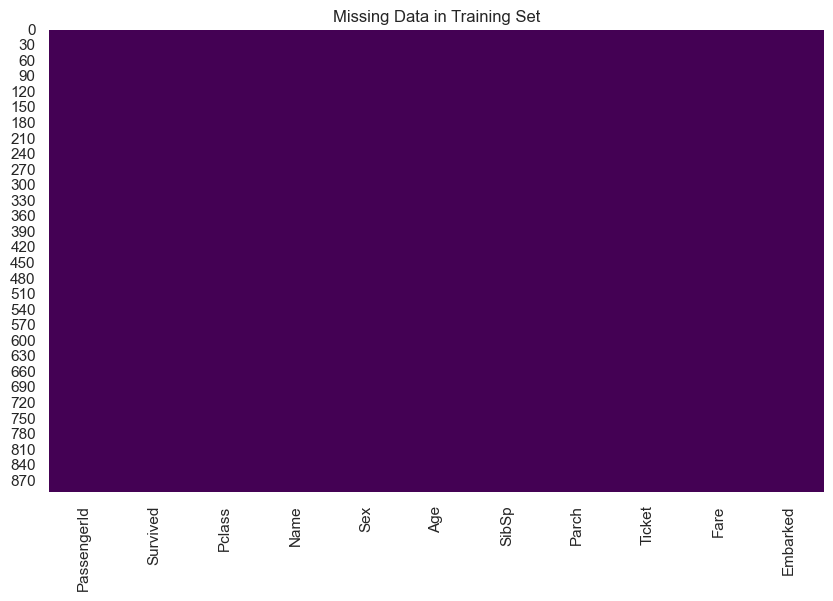

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data in Training Set")
plt.show()


**Survival count by gender**

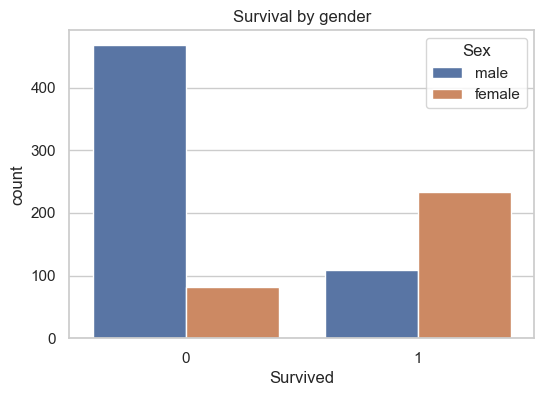

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', hue='Sex', data=train_data)
plt.title("Survival by gender")
plt.show()

**Age distribution**

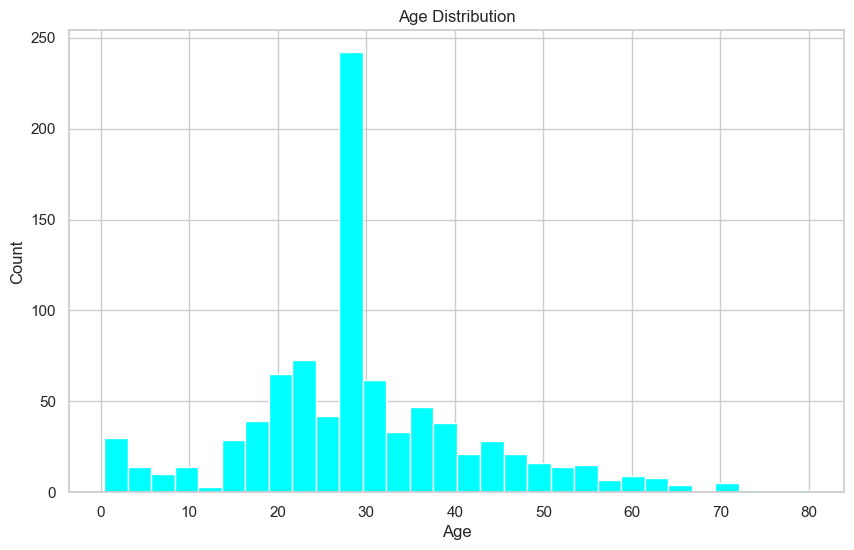

In [15]:
plt.figure(figsize=(10,6))
train_data['Age'].hist(bins=30, color='cyan')
plt.title("Age Distribution")
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**Survival by class**

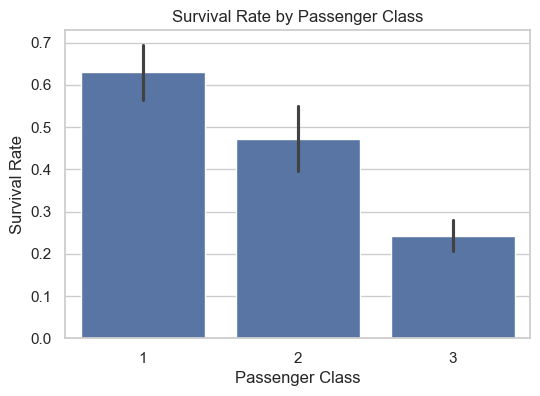

In [12]:
plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title("Survival Rate by Passenger Class")
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()
